In [202]:
import pandas as pd

def load_data(file_path, columns):
    data = pd.read_csv(file_path, usecols=columns)
    data.columns = ['Date', 'Value'] if len(columns) == 2 else columns
    data['Date'] = pd.to_datetime(data['Date'])
    return data

def merge_dataframes(df1, df2, df3):
    merged = df1.merge(df2, on='Date', suffixes=('_GSPC', '_FIGRX'))
    merged = merged.merge(df3, on='Date', suffixes=('', '_EURUSD'))
    return merged.sort_values(by='Date').reset_index(drop=True)

def calculate_changes(df, cols):
    for col in cols:
        df[f'{col}_change'] = df[col].pct_change() * 100
    return df

def preprocess_data():
    gspc2004 = load_data("./data/GSPC_2004.csv", ["Date", "Close"])
    figrx2004 = load_data("./data/FIGRX_2004.csv", ["Date", "Close"])
    eurusd2004 = pd.read_csv("./data/EURUSD_2004.csv", header=None, usecols=[1, 3])
    eurusd2004.columns = ['Date', 'Value']

    gspc2005 = load_data("./data/GSPC_2005.csv", ["Date", "Close"])
    figrx2005 = load_data("./data/FIGRX_2005.csv", ["Date", "Close"])
    eurusd2005 = pd.read_csv("./data/EURUSD_2005.csv", header=None, usecols=[1, 3])
    eurusd2005.columns = ['Date', 'Value']

    eurusd2004['Date'] = pd.to_datetime(eurusd2004['Date'])
    eurusd2005['Date'] = pd.to_datetime(eurusd2005['Date'])

    cols = ["Date", "Value_GSPC", "Value_FIGRX", "Value_EURUSD"]
    merged_data_2004 = merge_dataframes(gspc2004, figrx2004, eurusd2004)
    merged_data_2005 = merge_dataframes(gspc2005, figrx2005, eurusd2005)
    merged_data_2004.columns = cols
    merged_data_2005.columns = cols

    # print(merged_data_2004)
    
    cols = ["Value_GSPC", "Value_FIGRX", "Value_EURUSD"]
    merged_data_2004 = calculate_changes(merged_data_2004, cols)
    merged_data_2005 = calculate_changes(merged_data_2005, cols)

    # print(merged_data_2005)

    data2004_X = merged_data_2004[['Value_GSPC_change', 'Value_EURUSD_change']].values
    data2004_Y = merged_data_2004['Value_FIGRX_change'].shift(-1).dropna().values
    data2004_y = (data2004_Y > 0).astype(int)
    data2004_X = data2004_X[1:]

    data2005_X = merged_data_2005[['Value_GSPC_change', 'Value_EURUSD_change']].values
    data2005_Y = merged_data_2005['Value_FIGRX_change'].shift(-1).dropna().values
    data2005_y = (data2005_Y > 0).astype(int)
    data2005_X = data2005_X[1:]


    print("data2004.X:", data2004_X.shape)
    print("data2004.Y:", data2004_Y.shape)
    print("data2004.y:", data2004_y.shape)
    print("data2004.X:", data2005_X.shape)
    print("data2004.Y:", data2005_Y.shape)
    print("data2004.y:", data2005_y.shape)

    # print(data2004_Y)


    return (data2004_X, data2004_Y, data2004_y), (data2005_X, data2005_Y, data2005_y)


In [203]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline


# def plot_decision_boundary(model, X, y, title, poly=None):
#     # Generate a mesh grid within the range of the data
#     x_min, x_max = -2, 2#X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = -2, 2#X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

#     # Transform the mesh grid using the polynomial features
#     if poly:
#         X_mesh = poly.transform(np.c_[xx.ravel(), yy.ravel()])
#     else:
#         X_mesh = np.c_[xx.ravel(), yy.ravel()]
#     Z = model.predict(X_mesh)
#     Z = Z.reshape(xx.shape)

#     # Plot the decision boundary
#     plt.figure(figsize=(8, 6))
#     # plt.contour(xx, yy, Z, levels=[0], colors='black')  # Plot the decision boundary
#     plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

#     # Scatter the data points
#     plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='r', marker='o', label='UP', alpha=0.6, edgecolor='k')
#     plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='b', marker='^', label='DOWN', alpha=0.6, edgecolor='k')

#     # Set axis labels and title
#     plt.xlim(x_min, x_max)
#     plt.ylim(y_min, y_max)
#     plt.xlabel("SP500 (%)")
#     plt.ylabel("EURUSD (%)")
#     plt.title(title)
#     plt.legend()
#     plt.show()

# if __name__ == "__main__":
#     # Preprocess the data
#     train, test = preprocess_data()
#     train_X, train_Y, train_y = train
#     test_X, test_Y, test_y = test

#     # --- Linear Model ---
#     linear_clf = LogisticRegression()
#     linear_clf.fit(train_X, train_y)

#     # Plot Linear Model Decision Boundary
#     plot_decision_boundary(linear_clf, train_X, train_y, "Linear Model Decision Boundary (Training Data)")
#     plot_decision_boundary(linear_clf, test_X, test_y, "Linear Model Decision Boundary (Testing Data)")
    

#     # --- Quadratic Model ---
#     poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
#     X_poly = poly.fit_transform(train_X)
#     quadratic_clf = LogisticRegression()
#     quadratic_clf.fit(X_poly, train_y)

#     # # Plot Quadratic Model Decision Boundary
#     # plot_quadratic_boundary(quadratic_clf, poly, train_X, train_y, "Quadratic Model Decision Boundary")
#     plot_decision_boundary(quadratic_clf, train_X, train_y, "Quadratic Model Decision Boundary (Training Data)", poly)
#     plot_decision_boundary(quadratic_clf, test_X, test_y, "Quadratic Model Decision Boundary (Testing Data)", poly)

In [204]:
# import numpy as np
# import matplotlib.pyplot as plt

# def simulation(model, data, poly=None):
#     moneys = []
#     money = 1.0  # Starting with 1 unit of currency
#     if model is None:
#         # Buy-and-Hold strategy
#         for i in range(len(data["X"])):
#             money *= 1 + data["Y"][i] / 100  # Convert percentage change to multiplier
#             moneys.append(money - 1)  # Store cumulative gain/loss
#         return moneys

#     # Trading strategy using model predictions
#     for i in range(len(data["X"])):
#         # If a polynomial transformer is provided, transform the data
#         if poly:
#             transformed_X = poly.transform([data["X"][i]])
#         else:
#             transformed_X = [data["X"][i]]

#         predict = np.sign(model.predict(transformed_X))  # Predict and take the sign
#         if predict[0] > 0:  # If prediction is positive (BUY)
#             money *= 1 + data["Y"][i] / 100  # Convert percentage change to multiplier
#         moneys.append(money - 1)  # Store cumulative gain/loss
#     return moneys

# def plot_simulation_results(bh_results, strategy_results, quad_results, title="Trading Strategy vs. Buy-and-Hold"):
#     # Plot the results
#     plt.figure(figsize=(12, 6))
#     plt.plot(bh_results, label="Buy-and-Hold Strategy", color='orange', linestyle='--')
#     plt.plot(strategy_results, label="Linear Model Strategy", color='blue')
#     plt.plot(quad_results, label="Quadratic Model Strategy", color='green')
#     plt.xlabel("Day")
#     plt.ylabel("Cumulative Gain/Loss (%)")
#     plt.title(title)
#     plt.legend()
#     plt.grid(visible=True, linestyle='--', alpha=0.5)
#     plt.show()

# # Prepare the data
# test_data = {
#     "X": test_X,
#     "Y": test_Y
# }

# train_data = {
#     "X": train_X,
#     "Y": train_Y
# }

# # Simulate Buy-and-Hold strategy
# bh_results = simulation(None, test_data)

# # Simulate the trading strategy using the linear model
# strategy_results = simulation(linear_clf, test_data)

# # Simulate the trading strategy using the quadratic model
# quad_strategy_results = simulation(quadratic_clf, test_data, poly=poly)  # Pass the poly transformer

# # Plot the comparison
# plot_simulation_results(bh_results, strategy_results, quad_strategy_results, "Trading Strategy vs. Buy-and-Hold (Test Data)")

data2004.X: (242, 2)
data2004.Y: (242,)
data2004.y: (242,)
data2004.X: (244, 2)
data2004.Y: (244,)
data2004.y: (244,)


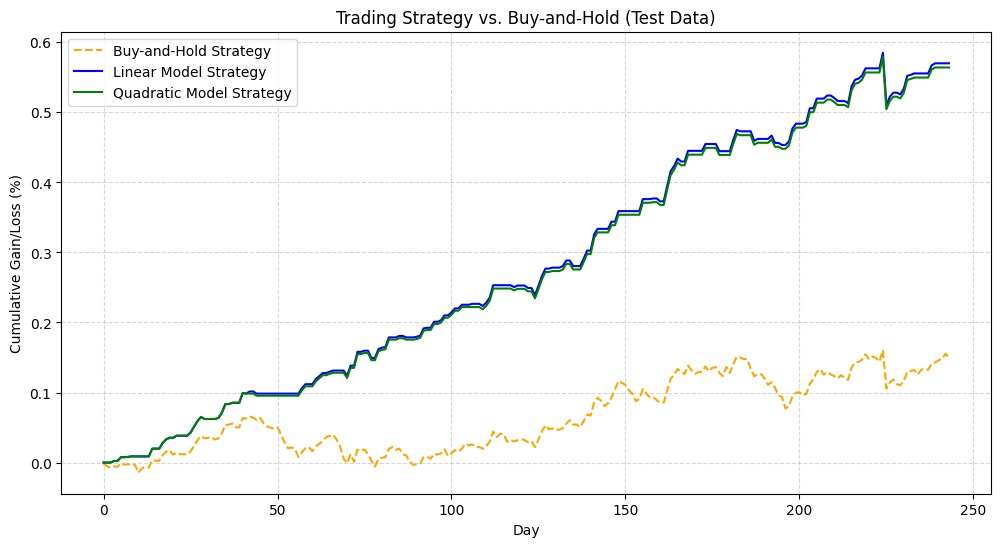

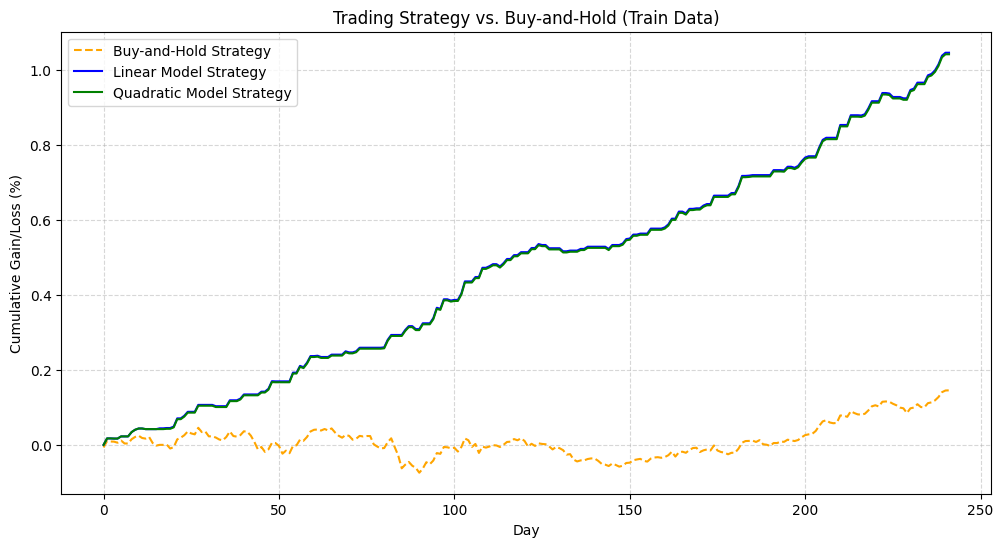

Model		GAIN (%)	EXPOSURE (%)
Linear Classifier	57.00		48.36
Quadratic Classifier	56.41		47.54
Buy-and-Hold (B-H)	14.92		100.00


In [226]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Plotting decision boundary
def plot_decision_boundary(model, X, y, title, poly=None):
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    X_mesh = poly.transform(np.c_[xx.ravel(), yy.ravel()]) if poly else np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_mesh).reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='r', label='UP', edgecolor='k', s=50)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='b', label='DOWN', edgecolor='k', s=50)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("SP500 (%)")
    plt.ylabel("EURUSD (%)")
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

def simulation(model, data):
    moneys = []
    money = 1.0
    for i in range(len(data["X"])):
        if model is None:
            # Buy-and-Hold strategy
            money *= 1 + data["Y"][i] / 100
        else:
            predict = np.sign(model.predict([data["X"][i]]))
            if predict[0] > 0:  # BUY action
                money *= 1 + data["Y"][i] / 100
        moneys.append(money - 1)  # Store cumulative gain/loss
    return moneys


# Plotting simulation results
def plot_simulation_results(bh_results, strategy_results, quad_results, title):
    plt.figure(figsize=(12, 6))
    plt.plot(bh_results, label="Buy-and-Hold Strategy", color='orange', linestyle='--')
    plt.plot(strategy_results, label="Linear Model Strategy", color='blue')
    plt.plot(quad_results, label="Quadratic Model Strategy", color='green')
    plt.xlabel("Day")
    plt.ylabel("Cumulative Gain/Loss (%)")
    plt.title(title)
    plt.legend()
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()

# Assuming preprocess_data() returns (train_X, train_Y, train_y), (test_X, test_Y, test_y)
train, test = preprocess_data()
train_X, train_Y, train_y = train
test_X, test_Y, test_y = test

# --- Linear Model ---
linear_clf = LogisticRegression()
linear_clf.fit(train_X, train_y)

# --- Quadratic Model ---
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# train_X_poly = poly.fit_transform(train_X)
# test_X_poly = poly.transform(test_X)
# quadratic_clf = LogisticRegression()
# quadratic_clf.fit(train_X_poly, train_y)

quadratic_clf = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2)),
        ("logistic", LogisticRegression()),
    ]
)
quadratic_clf.fit(train_X, train_y)




# Prepare test data for simulation
train_data = {
    "X": train_X,
    "Y": train_Y
}


test_data = {
    "X": test_X,
    "Y": test_Y
}

# Simulate Buy-and-Hold strategy
bh_results = simulation(None, test_data)

# Simulate the trading strategy using the linear model
strategy_results = simulation(linear_clf, test_data)

# Simulate the trading strategy using the quadratic model
quad_strategy_results = simulation(quadratic_clf, test_data)

# Plot the comparison of strategies on test data
plot_simulation_results(bh_results, strategy_results, quad_strategy_results, "Trading Strategy vs. Buy-and-Hold (Test Data)")

# Plot the comparison of strategies on train data
plot_simulation_results(simulation(None, train_data), simulation(linear_clf, train_data),simulation(quadratic_clf, train_data) , "Trading Strategy vs. Buy-and-Hold (Train Data)")


# Simulate the Buy-and-Hold strategy, Linear model, and Quadratic model as done in your previous setup

# Function to calculate GAIN (%) and EXPOSURE (%)
def calculate_metrics(simulation_results, predictions):
    # GAIN (%) - Final cumulative gain or loss in percentage
    gain_percent = (simulation_results[-1] * 100)  # Convert to percentage

    # EXPOSURE (%) - Proportion of time in BUY (invested) state
    exposure_percent = (np.sum(predictions > 0) / len(predictions)) * 100  # BUY actions count towards exposure

    return gain_percent, exposure_percent

# Assume that `bh_results`, `strategy_results`, and `quad_strategy_results` are cumulative gains lists for each strategy
# Also assume `linear_predictions` and `quad_predictions` indicate the model's buy/sell actions

# --- Buy-and-Hold (B-H) Metrics ---
bh_gain, bh_exposure = calculate_metrics(bh_results, np.ones(len(bh_results)))  # Exposure is always 100% for B-H

# --- Linear Model Metrics ---
linear_predictions = linear_clf.predict(test_X)  # Predict for each day in the test set
linear_gain, linear_exposure = calculate_metrics(strategy_results, linear_predictions)

# --- Quadratic Model Metrics ---
quad_predictions = quadratic_clf.predict(test_X)  # Predict for each day in the test set
quad_gain, quad_exposure = calculate_metrics(quad_strategy_results, quad_predictions)

# Display the results
print(f"Model\t\tGAIN (%)\tEXPOSURE (%)")
print(f"Linear Classifier\t{linear_gain:.2f}\t\t{linear_exposure:.2f}")
print(f"Quadratic Classifier\t{quad_gain:.2f}\t\t{quad_exposure:.2f}")
print(f"Buy-and-Hold (B-H)\t{bh_gain:.2f}\t\t{bh_exposure:.2f}")

